In [ ]:
# metamarkers

In [2]:
library(data.table)
library(dplyr)
library(ggplot2)
library(MetaMarkers)
library(RColorBrewer)

In [3]:
dirs = c('Govek', 'Hamed', 'La_Manno')
studies = dirs
length(dirs)

[1] 3

In [9]:
# load markers
markers = list(
    govek = read_markers(paste0(dirs[1], "/", studies[1], "_celltype_markers_N1N2.csv.gz")),
    hamed = read_markers(paste0(dirs[2], "/", studies[2], "_celltype_markers_N1N2.csv.gz")),
    la_manno = read_markers(paste0(dirs[3], "/", studies[3], "_celltype_markers_N1N2.csv.gz"))
)

In [10]:
options(warn = -1)
meta_markers = make_meta_markers(markers, fc_threshold = 1.5, common_genes_only = FALSE, detailed_stats = TRUE)

In [11]:
# 33,530 genes in total
dim(meta_markers)
head(meta_markers)

[1] 100590     16

group cell_type        rank gene          recurrence auroc     fold_change
1 all   Neurog1_positive 1    Neurog1       2          0.7905886 3.2041878  
2 all   Neurog1_positive 2    Hbb-y         2          0.5862988 1.8293890  
3 all   Neurog1_positive 3    2510009E07Rik 2          0.5761267 1.8561779  
4 all   Neurog1_positive 4    Otx2          2          0.5528313 0.9194001  
5 all   Neurog1_positive 5    Ebf3          2          0.5492572       NaN  
6 all   Neurog1_positive 6    Ccnd1         2          0.5457951 0.7963033  
  fold_change_detection expression precision recall    population_size
1 4.588822               701.83449 0.2705065 1.0000000 2969.333       
2 1.340543              2555.07350 0.1182218 0.6676541 2453.500       
3 1.694291                99.35974 0.1371395 0.3811719 2453.500       
4 1.603890               344.11490 0.1694863 0.5580518 2969.333       
5 1.402161                     NaN 0.1434032 0.5679892 2969.333       
6 1.311069               528.98091 0.1226883 0.5248851 2969.333       
  n_datasets govek hamed la_manno
1 3          TRUE  FALSE TRUE    
2 2          TRUE     NA TRUE    
3 2          TRUE     NA TRUE    
4 3          TRUE  FALSE TRUE    
5 3          TRUE  FALSE TRUE    
6 3          TRUE  FALSE TRUE

In [42]:
# save
write.table(meta_markers, file = 'N1N2_metamarkers.csv', sep = ',', row.names = F,
           col.names = T, quote = F)

In [12]:
# dfs for each cell type
tab1 = meta_markers[meta_markers$cell_type=='double_positive',]
tab2 = meta_markers[meta_markers$cell_type=='Neurog2_positive',]
tab3 = meta_markers[meta_markers$cell_type=='Neurog1_positive',]

head(tab1, n = 20)

group cell_type       rank gene    recurrence auroc     fold_change
1  all   double_positive  1   Neurog1 3          0.9016972 22.820055  
2  all   double_positive  2   Btg2    3          0.6831898  5.098237  
3  all   double_positive  3   Vim     3          0.6587578 12.843833  
4  all   double_positive  4   Ccnd1   3          0.6566928  4.995269  
5  all   double_positive  5   Dbx1    3          0.6508801  4.973871  
6  all   double_positive  6   Nuak2   3          0.6486897  7.505135  
7  all   double_positive  7   Baz1a   3          0.5993917  3.820364  
8  all   double_positive  8   Igsf8   3          0.5959443  3.736307  
9  all   double_positive  9   Cald1   3          0.5909443  3.529216  
10 all   double_positive 10   Sdk2    3          0.5697753 14.846323  
11 all   double_positive 11   Neurog2 2          0.8053398       NaN  
12 all   double_positive 12   Mfng    2          0.7405371  2.849592  
13 all   double_positive 13   Hes6    2          0.7298140       NaN  
14 all   double_positive 14   Gadd45g 2          0.7283653       NaN  
15 all   double_positive 15   Tead2   2          0.7018095  2.102209  
16 all   double_positive 16   Fam110a 2          0.6819882  2.282996  
17 all   double_positive 17   Srrm4   2          0.6813778       NaN  
18 all   double_positive 18   Spsb4   2          0.6752266  2.333279  
19 all   double_positive 19   Btbd17  2          0.6646519       NaN  
20 all   double_positive 20   Zc3h12c 2          0.6629291  2.380259  
   fold_change_detection expression precision recall    population_size
1  7.274393              1052.6162  0.6924245 1.0000000 9487.0         
2  1.676888              1102.6085  0.3823258 0.7492617 9487.0         
3  1.283522              3006.6657  0.3504490 0.8155888 9487.0         
4  1.698524              1526.1737  0.3779666 0.6403706 9487.0         
5  1.987784               551.6110  0.4043778 0.5128384 9487.0         
6  1.673821               564.1695  0.3833298 0.5844429 9487.0         
7  1.579635               582.8264  0.3689825 0.4872708 9487.0         
8  1.367999                    NaN  0.3580618 0.5693150 9487.0         
9  1.347791               791.3724  0.3557426 0.5913380 9487.0         
10 1.554398               303.6810  0.3699057 0.4090216 9487.0         
11 1.346958              2797.0875  0.3678525 1.0000000 9487.0         
12 2.307909               311.0110  0.2109585 0.7670831 3359.5         
13 1.446705              2340.2515  0.3707445 0.7899189 9487.0         
14 1.701497              2939.8309  0.3870520 0.8014828 9487.0         
15 1.880750               308.1305  0.1767145 0.8134888 3359.5         
16 1.669679               315.7683  0.1671552 0.7230971 3359.5         
17 1.568699              1908.7860  0.3784931 0.7587794 9487.0         
18 1.991094               203.4047  0.1913119 0.6429512 3359.5         
19 1.696909              1152.4665  0.3833330 0.6802130 9487.0         
20 1.965779               197.4681  0.2007991 0.6115419 3359.5         
   n_datasets govek hamed la_manno
1  3          TRUE   TRUE TRUE    
2  3          TRUE   TRUE TRUE    
3  3          TRUE   TRUE TRUE    
4  3          TRUE   TRUE TRUE    
5  3          TRUE   TRUE TRUE    
6  3          TRUE   TRUE TRUE    
7  3          TRUE   TRUE TRUE    
8  3          TRUE   TRUE TRUE    
9  3          TRUE   TRUE TRUE    
10 3          TRUE   TRUE TRUE    
11 3          TRUE  FALSE TRUE    
12 2          TRUE     NA TRUE    
13 3          TRUE  FALSE TRUE    
14 3          TRUE  FALSE TRUE    
15 2          TRUE     NA TRUE    
16 2          TRUE     NA TRUE    
17 3          TRUE  FALSE TRUE    
18 2          TRUE     NA TRUE    
19 3          TRUE  FALSE TRUE    
20 2          TRUE     NA TRUE

In [15]:
table(tab1$recurrence)
tab1$gene[tab1$recurrence>1]


    0     1     2     3 
31040  2305   175    10 

[1] "Neurog1"       "Btg2"          "Vim"           "Ccnd1"        
  [5] "Dbx1"          "Nuak2"         "Baz1a"         "Igsf8"        
  [9] "Cald1"         "Sdk2"          "Neurog2"       "Mfng"         
 [13] "Hes6"          "Gadd45g"       "Tead2"         "Fam110a"      
 [17] "Srrm4"         "Spsb4"         "Btbd17"        "Zc3h12c"      
 [21] "Dll1"          "Cbfa2t2"       "Tfdp2"         "Ebf2"         
 [25] "Chd7"          "Rcor2"         "Hmgn5"         "Ccnd2"        
 [29] "Tpm4"          "Neurod4"       "E2f1"          "Ppp1r14a"     
 [33] "Igfbp2"        "Rai14"         "Magi1"         "Otx2"         
 [37] "Rgs16"         "St18"          "Abracl"        "Insm1"        
 [41] "Miat"          "Tfap2c"        "Notch1"        "Heg1"         
 [45] "Dll3"          "Rhbdl3"        "Barhl2"        "Eml5"         
 [49] "Sstr2"         "Myo10"         "Mecom"         "Rrm2"         
 [53] "Otx1"          "Abcd2"         "Ly6e"          "Irx3"         
 [57] "Gse1"          "Tgif2"         "Nkd1"          "Dmrta2"       
 [61] "Irx5"          "Phldb2"        "Cdc42ep4"      "Rassf4"       
 [65] "Hes5"          "Nkx6-1"        "Wscd1"         "Sulf1"        
 [69] "Lsr"           "Palld"         "Fzd10"         "Plk3"         
 [73] "Ppic"          "Gm42047"       "Wnt5a"         "Gsta4"        
 [77] "Mapkapk2"      "Gpx8"          "Svil"          "Zeb1"         
 [81] "Cdkn1c"        "Nxn"           "Itga4"         "Cenpa"        
 [85] "Cdca7"         "Gadd45a"       "Prdx6"         "Clspn"        
 [89] "Pgpep1"        "Cdc25b"        "Sapcd2"        "Pdpn"         
 [93] "Ackr3"         "Ndnf"          "Cenpe"         "Cdca8"        
 [97] "Uhrf1"         "Cdc20"         "Cenpf"         "Knstrn"       
[101] "Fbxl7"         "Ccnb1"         "Col18a1"       "Birc5"        
[105] "Ccnb2"         "Igdcc4"        "Psrc1"         "Cmtm7"        
[109] "Synpr"         "Tacc3"         "Hk2"           "Tpx2"         
[113] "Cenpw"         "Neil3"         "Aim2"          "Prom1"        
[117] "Numbl"         "Gprc5b"        "Cenpm"         "Anln"         
[121] "Hmga2"         "Cdca3"         "Kif23"         "Pimreg"       
[125] "Aspm"          "Dusp10"        "Knl1"          "Tgif1"        
[129] "Lsp1"          "Kif22"         "Racgap1"       "Kif4"         
[133] "Dhfr"          "Prmt8"         "Dhrs4"         "Ckap2"        
[137] "Pdlim1"        "Alpl"          "Hmmr"          "Igdcc3"       
[141] "Tuba1c"        "Amotl2"        "Serping1"      "Ifitm2"       
[145] "Crybg3"        "Arhgap31"      "Tnfrsf19"      "Iqgap2"       
[149] "Fgfr3"         "Rgs13"         "Boc"           "Zfp36l1"      
[153] "D16Ertd472e"   "Efs"           "Txnip"         "Mylip"        
[157] "Akr1b8"        "Gem"           "Cog1"          "Rhoc"         
[161] "Cep76"         "Cxcl14"        "Cenpj"         "Zbtb16"       
[165] "Cyba"          "Cflar"         "Rasl11b"       "Eif4e3"       
[169] "Galnt18"       "Hes1"          "Pim1"          "Cdk2"         
[173] "Tspan11"       "Angpt1"        "Ttc23"         "2700046A07Rik"
[177] "Tnfaip8"       "Pkib"          "Mybl1"         "Antxr2"       
[181] "Spon1"         "Gm13889"       "E2f7"          "E2f2"         
[185] "Macrod2"

In [17]:
colSums(tab1[tab1$recurrence>0,14:16], na.rm = T)

govek    hamed la_manno 
     771     1723      191

In [20]:
# for z-score of ranks --- heatmap
glist = unique(meta_markers$gene)
df = data.frame(gene = glist, N1N2_rank = tab1$rank[match(glist, tab1$gene)],
                N2_rank = tab2$rank[match(glist, tab2$gene)], N1_rank = tab3$rank[match(glist, tab3$gene)])

df$double_positive = 100 - (df$N1N2_rank*100/length(glist))
df$Neurog2_positive = 100 - (df$N2_rank*100/length(glist))
df$Neurog1_positive = 100 - (df$N1_rank*100/length(glist))

rsum = rowSums(df[,5:7], na.rm = T)

# scale for composition plot
df[,5] <- df[,5]*100/rsum
df[,6] <- df[,6]*100/rsum
df[,7] <- df[,7]*100/rsum
df[1:2,]

gene    N1N2_rank N2_rank N1_rank double_positive Neurog2_positive
1 Neurog1    1      33530   1       50.00000        0.000000        
2 Hbb-y   2617      32621   2       47.30375        1.390972        
  Neurog1_positive
1 50.00000        
2 51.30528

In [21]:
# get zscores
df[,8:10] <- t(scale(t(df[,2:4]), center = TRUE, scale = TRUE))
colnames(df)[8:10] = c('N1N2_zscore', 'N2_zscore', 'N1_zscore')
df[1:3,]

gene          N1N2_rank N2_rank N1_rank double_positive Neurog2_positive
1 Neurog1          1      33530   1       50.00000        0.000000        
2 Hbb-y         2617      32621   2       47.30375        1.390972        
3 2510009E07Rik 6617      30537   3       42.42744        4.718364        
  Neurog1_positive N1N2_zscore N2_zscore N1_zscore 
1 50.00000         -0.5773503  1.154701  -0.5773503
2 51.30528         -0.5037078  1.151692  -0.6479843
3 52.85419         -0.3591141  1.129966  -0.7708523

In [43]:
# save
write.table(df, file = 'N1N2_marker_zscores.csv', sep = ',', row.names = F,
           col.names = T, quote = F)

In [23]:
# more negative is higher ranked marker
df[df$gene=='Neurod2',]

gene    N1N2_rank N2_rank N1_rank double_positive Neurog2_positive
33442 Neurod2 2746      1526    33442   48.95986        50.90018        
      Neurog1_positive N1N2_zscore N2_zscore  N1_zscore
33442 0.139958         -0.5432918  -0.6107517 1.154043

In [25]:
mm=tab1[tab1$gene %in% df[df$double_positive>80,'gene'],]
mm$gene[mm$recurrence>=2]

[1] "Nuak2"    "Igsf8"    "Neurog2"  "Hes6"     "Srrm4"    "Zc3h12c" 
 [7] "Dll1"     "Igfbp2"   "Magi1"    "Abracl"   "Insm1"    "Miat"    
[13] "Tfap2c"   "Rhbdl3"   "Barhl2"   "Eml5"     "Sstr2"    "Myo10"   
[19] "Otx1"     "Abcd2"    "Ly6e"     "Nkd1"     "Dmrta2"   "Gm42047" 
[25] "Wnt5a"    "Gsta4"    "Itga4"    "Cdca7"    "Sapcd2"   "Ackr3"   
[31] "Fbxl7"    "Igdcc4"   "Psrc1"    "Synpr"    "Hk2"      "Aim2"    
[37] "Gprc5b"   "Dusp10"   "Tgif1"    "Ifitm2"   "Arhgap31" "Txnip"   
[43] "Mylip"    "Gem"      "Cflar"    "Spon1"    "Gm13889"

In [26]:
df[match(c('Neurod2', 'Nhlh2', 'Bcl11b', 'Eomes', 'Sox2', 'Sox9', 'Pax6', 'Hes1'), df$gene),]

gene    N1N2_rank N2_rank N1_rank double_positive Neurog2_positive
33442 Neurod2 2746       1526   33442   48.95986        50.900184       
31843 Nhlh2   3035      32356   31843   91.42283         3.519607       
32608 Bcl11b  4454       1401   32608   46.80091        51.715035       
33490 Eomes    218      32795   33490   97.72641         2.156247       
33014 Sox2    2117      27658   33014   83.10098        15.533981       
32967 Sox9    4520       1355   32967   46.98128        52.106951       
33375 Pax6    2603      31251   33375   92.70406         6.831330       
31401 Hes1     170       1472   31401   49.38783        47.460287       
      Neurog1_positive N1N2_zscore N2_zscore  N1_zscore
33442 0.1399580        -0.5432918  -0.6107517 1.1540435
31843 5.0575609        -1.1545657   0.5925667 0.5619989
32608 1.4840569        -0.4863432  -0.6638029 1.1501461
33490 0.1173468        -1.1545076   0.5589760 0.5955316
33014 1.3650433        -1.1394106   0.4075092 0.7319014
32967 0.9117704        -0.4840621  -0.6658582 1.1499203
33375 0.4646144        -1.1524938   0.5144521 0.6380417
31401 3.1518794        -0.6138058  -0.5401106 1.1539164

In [41]:
df[df$gene=='Hes6',]

gene N1N2_rank N2_rank N1_rank double_positive Neurog2_positive
27047 Hes6 13        33475   27047   83.67744        0.1373112       
      Neurog1_positive N1N2_zscore N2_zscore N1_zscore
27047 16.18525         -1.135629   0.7488136 0.3868151

In [37]:
# get z-score heatmap
coul <- colorRampPalette(brewer.pal(8, "YlOrRd"))(25)

glist2 = c('Nhlh2', 'Eomes', 'Sox2', 'Neurod2', 'Bcl11b', 'Sox9', 'Hes1',
            'Rnd2', 'Mef2c', 'Neurod6',  'Hes1', 
               'Neurog1', 'Hes5', 'Dll1')
mat2 = as.matrix(df[match(glist2, df$gene), c('N1N2_zscore', 'N2_zscore', 'N1_zscore')])
mat2 <- -1*mat2
rownames(mat2) = glist2

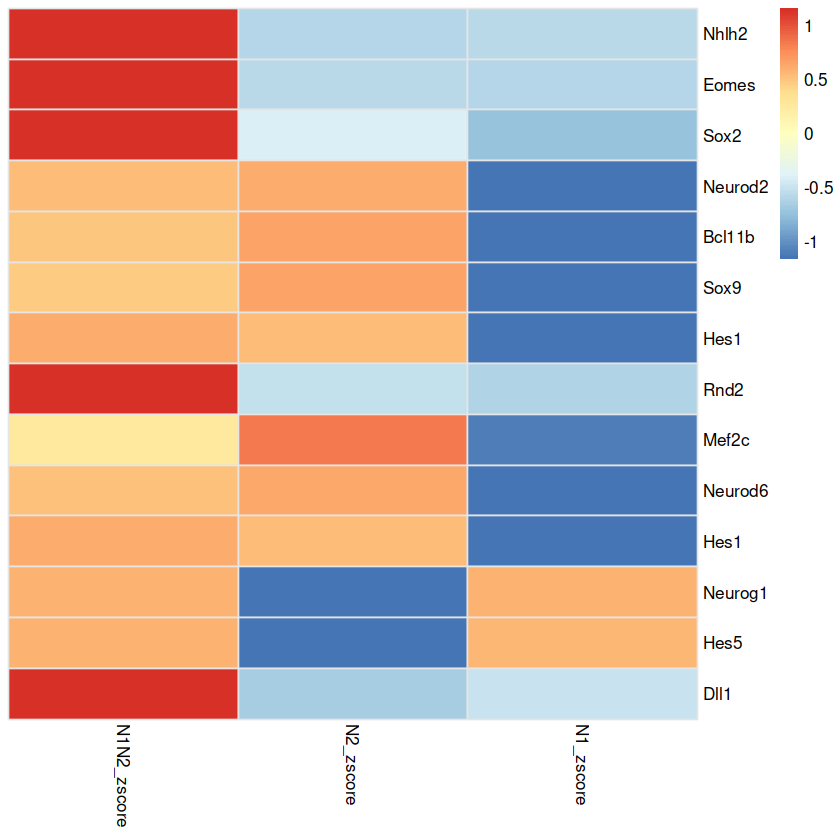

In [44]:
plot1 = pheatmap::pheatmap(mat2, cluster_rows = 0, cluster_cols = 0, 
                    border_color = 'grey90')

In [45]:
save_pheatmap_pdf <- function(x, filename, width=7, height=7) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   pdf(filename, width=width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}
save_pheatmap_pdf(plot1, "aa-n1n2-heatmap.pdf")

pdf 
  2